In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/grimur/git/nplinker/nplinker/prototype/')

In [3]:
from nplinker import nplinker
from nplinker import logconfig
logconfig.LogConfig.setLogLevel('DEBUG')

from nplinker.parsers.kcb import KCBParser
from nplinker.scoring import misc

In [4]:
from nplinker.strains import Strain, StrainCollection

In [5]:
strain_ids = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
strain_collection = StrainCollection()
for strain_id in strain_ids:
    s = Strain(strain_id)
    strain_collection.add(s)

In [6]:
npl = nplinker.NPLinker('/home/grimur/data-crusemann/nplinker_crusemann_20200131/crusemann_new.toml')

14:45:42 [DEBUG] config.py:71, Parsing default config file: /home/grimur/.config/nplinker/nplinker.toml
14:45:42 [DEBUG] config.py:74, Loading user config /home/grimur/data-crusemann/nplinker_crusemann_20200131/crusemann_new.toml
14:45:42 [INFO] config.py:106, Loading from local data in directory /home/grimur/data-crusemann/nplinker_crusemann_26112019
14:45:42 [DEBUG] loader.py:129, DatasetLoader(/home/grimur/data-crusemann/nplinker_crusemann_26112019, , False)
14:45:42 [DEBUG] nplinker.py:119, Enabled scoring method: metcalf
14:45:42 [DEBUG] nplinker.py:119, Enabled scoring method: testscore
14:45:42 [DEBUG] nplinker.py:119, Enabled scoring method: rosetta


In [7]:
npl._strains = strain_collection

In [8]:
from nplinker.genomics import BGC
from nplinker.genomics import GCF
import numpy

In [9]:
bgcs = []
gcfs = []

g = GCF(id=1, gcf_id="alpha", product_type=None)
b = BGC(id=1, strain=strain_collection.lookup('A'), name=1, bigscape_class=None, product_prediction=None)
g.add_bgc(b)
bgcs.append(b)
b = BGC(id=2, strain=strain_collection.lookup('B'), name=2, bigscape_class=None, product_prediction=None)
g.add_bgc(b)
bgcs.append(b)
b = BGC(id=3, strain=strain_collection.lookup('C'), name=3, bigscape_class=None, product_prediction=None)
g.add_bgc(b)
bgcs.append(b)
b = BGC(id=4, strain=strain_collection.lookup('D'), name=4, bigscape_class=None, product_prediction=None)
g.add_bgc(b)
bgcs.append(b)
gcfs.append(g)


g = GCF(id=2, gcf_id="beta", product_type=None)
b = BGC(id=5, strain=strain_collection.lookup('E'), name=5, bigscape_class=None, product_prediction=None)
g.add_bgc(b)
bgcs.append(b)
b = BGC(id=6, strain=strain_collection.lookup('F'), name=6, bigscape_class=None, product_prediction=None)
g.add_bgc(b)
bgcs.append(b)
b = BGC(id=7, strain=strain_collection.lookup('G'), name=7, bigscape_class=None, product_prediction=None)
g.add_bgc(b)
bgcs.append(b)
b = BGC(id=8, strain=strain_collection.lookup('H'), name=8, bigscape_class=None, product_prediction=None)
g.add_bgc(b)
bgcs.append(b)
b = BGC(id=9, strain=strain_collection.lookup('C'), name=9, bigscape_class=None, product_prediction=None)
g.add_bgc(b)
bgcs.append(b)
gcfs.append(g)

g = GCF(id=3, gcf_id="gamma", product_type=None)
b = BGC(id=10, strain=strain_collection.lookup('B'), name=10, bigscape_class=None, product_prediction=None)
g.add_bgc(b)
bgcs.append(b)
b = BGC(id=11, strain=strain_collection.lookup('F'), name=11, bigscape_class=None, product_prediction=None)
g.add_bgc(b)
bgcs.append(b)
b = BGC(id=12, strain=strain_collection.lookup('H'), name=12, bigscape_class=None, product_prediction=None)
g.add_bgc(b)
bgcs.append(b)
gcfs.append(g)


npl._bgcs = bgcs
npl._gcfs = gcfs


In [10]:
from nplinker.metabolomics import Spectrum, MolecularFamily

In [11]:
spectra = []
molfams = []

s = Spectrum(id=1, peaks=[(1, 1)], spectrum_id=1, precursor_mz=0)
s.add_strain(strain=strain_collection.lookup('A'), growth_medium=None, peak_intensity=None)
s.add_strain(strain=strain_collection.lookup('B'), growth_medium=None, peak_intensity=None)
s.add_strain(strain=strain_collection.lookup('C'), growth_medium=None, peak_intensity=None)
s.add_strain(strain=strain_collection.lookup('D'), growth_medium=None, peak_intensity=None)

spectra.append(s)
mf = MolecularFamily("alpha")
mf.add_spectrum(s)
molfams.append(mf)

s = Spectrum(id=2, peaks=[(1, 1)], spectrum_id=2, precursor_mz=0)
s.add_strain(strain=strain_collection.lookup('E'), growth_medium=None, peak_intensity=None)
s.add_strain(strain=strain_collection.lookup('F'), growth_medium=None, peak_intensity=None)
s.add_strain(strain=strain_collection.lookup('H'), growth_medium=None, peak_intensity=None)
s.add_strain(strain=strain_collection.lookup('C'), growth_medium=None, peak_intensity=None)
spectra.append(s)
mf = MolecularFamily("beta")
mf.add_spectrum(s)
molfams.append(mf)

s = Spectrum(id=3, peaks=[(1, 1)], spectrum_id=3, precursor_mz=0)
s.add_strain(strain=strain_collection.lookup('B'), growth_medium=None, peak_intensity=None)
s.add_strain(strain=strain_collection.lookup('F'), growth_medium=None, peak_intensity=None)
spectra.append(s)
mf = MolecularFamily("gamma")
mf.add_spectrum(s)
molfams.append(mf)

npl._spectra = spectra
npl._molfams = molfams


In [12]:
from Bio import Phylo
import io

In [13]:
tree = Phylo.read(io.StringIO("((A, B), (C, D)), ((E, F), (G, H))"), "newick")

In [14]:
Phylo.draw_ascii(tree)

                                                    ________________________ A
                           ________________________|
                          |                        |________________________ B
  ________________________|
 |                        |                         ________________________ C
 |                        |________________________|
 |                                                 |________________________ D
_|
 |                                                  ________________________ E
 |                         ________________________|
 |                        |                        |________________________ F
 |________________________|
                          |                         ________________________ G
                          |________________________|
                                                   |________________________ H



In [15]:
import matplotlib.pyplot as plt

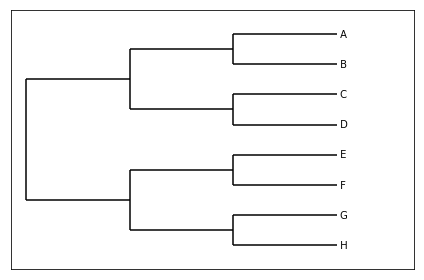

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))


Phylo.draw(tree, axes=ax1, do_show=False)

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xlabel('')
ax1.set_ylabel('')

plt.tight_layout()

plt.savefig('fig_synthetic_tree.pdf')

In [17]:
import phylo_collapse

In [18]:
for g in npl.gcfs:
    for m in npl.molfams:
        if g.gcf_id == m.family_id:
            print(m.family_id, end='\t')
            for s in npl.strains:
                if s in g.strains:
                    if s in m.strains:
                        print('x', end='')
                    else:
                        print('o', end='')
                else:
                    print('-', end='')
            print('')
                

alpha	xxxx----
beta	--x-xxox
gamma	-x---x-o


In [32]:
def test(tree, num_samples=10000):
    strains = [x.name for x in tree.get_terminals()]
    
    scores = []
    for gcf_strain in strains:
        for mf_strain in strains:
            if gcf_strain == mf_strain:
                continue
    #for i in range(num_samples):
    #    gcf_strain = numpy.random.choice(strains)
    #    mf_strain = numpy.random.choice(strains)

            phylo_dist = len(tree.trace(gcf_strain, mf_strain))

            gcf_strain_object = npl.strains.lookup(gcf_strain)
            mf_strain_object = npl.strains.lookup(mf_strain)

            potential_gcfs = [x for x in npl.gcfs if gcf_strain_object in x.strains]
            potential_mfs = [x for x in npl.molfams if mf_strain_object in x.strains]

            max_corr_score = -10000
            max_phylo_score = -10000
            for gcf in potential_gcfs:
                for mf in potential_mfs:
                    corr_score = phylo_collapse.calculate_correlation(tree, mf, gcf, collapse=False)
                    phylo_score = phylo_collapse.calculate_correlation(tree, mf, gcf, collapse=True)
                    max_corr_score = max(max_corr_score, corr_score)
                    max_phylo_score = max(max_phylo_score, phylo_score)

            #print(phylo_dist, max_corr_score, max_phylo_score)
            if max_corr_score != -10000 and max_phylo_score != -10000:
                scores.append((phylo_dist, max_corr_score, max_phylo_score))
        
    return scores

In [33]:
score_comparison = test(tree)

In [34]:
import scipy.stats

In [35]:
print(scipy.stats.spearmanr([x[0] for x in score_comparison], [x[1] for x in score_comparison]))
print(scipy.stats.spearmanr([x[0] for x in score_comparison], [x[2] for x in score_comparison]))

SpearmanrResult(correlation=-0.7591902558638323, pvalue=2.5770683201940603e-10)
SpearmanrResult(correlation=-0.3435281055188943, pvalue=0.01566321359478596)


In [36]:
print(scipy.stats.pearsonr([x[0] for x in score_comparison], [x[1] for x in score_comparison]))
print(scipy.stats.pearsonr([x[0] for x in score_comparison], [x[2] for x in score_comparison]))

(-0.6160527304605112, 2.4522646916527043e-06)
(-0.4410268376378295, 0.001514919593864457)


In [37]:
raw_res = []
std_res = []
col_res = []

for gcf in npl.gcfs:
    for mf in npl.molfams:
        link_id = "mf:$\{}$-gcf:$\{}$".format(mf.family_id, gcf.gcf_id)
        col_score = phylo_collapse.calculate_correlation(tree, mf, gcf)
        std_score = phylo_collapse.calculate_correlation(tree, mf, gcf, collapse=False)
        raw_score = phylo_collapse.calculate_correlation(tree, mf, gcf, collapse=False, standardised=False)

        raw_res.append((link_id, raw_score))
        std_res.append((link_id, std_score))
        col_res.append((link_id, col_score))

        print(link_id, raw_score, std_score, col_score)
        
raw_res.sort(key=lambda x:x[1], reverse=True)
std_res.sort(key=lambda x:x[1], reverse=True)
col_res.sort(key=lambda x:x[1], reverse=True)

for a, b, c in zip(raw_res, std_res, col_res):
    print("{} & {} & {} & {:.04f} & {} & {:.04f}".format(*(a + b + c)))

mf:$\alpha$-gcf:$\alpha$ 44 2.6457513110645916 0.9999999999999997
mf:$\beta$-gcf:$\alpha$ -19 -1.3228756555322958 -0.7453559924999298
mf:$\gamma$-gcf:$\alpha$ 3 4.845410522502482e-16 0.0
mf:$\alpha$-gcf:$\beta$ -20 -2.0493901531919194 -0.9999999999999998
mf:$\beta$-gcf:$\beta$ 43 2.0493901531919185 1.5811388300841887
mf:$\gamma$-gcf:$\beta$ 2 -0.39440531887330726 -0.22360679774997883
mf:$\alpha$-gcf:$\gamma$ -18 -0.6831300510639728 -0.40824829046386296
mf:$\beta$-gcf:$\gamma$ 3 0.6831300510639733 0.6831300510639733
mf:$\gamma$-gcf:$\gamma$ 25 1.97202659436654 1.7888543819998326
mf:$\alpha$-gcf:$\alpha$ & 44 & mf:$\alpha$-gcf:$\alpha$ & 2.6458 & mf:$\gamma$-gcf:$\gamma$ & 1.7889
mf:$\beta$-gcf:$\beta$ & 43 & mf:$\beta$-gcf:$\beta$ & 2.0494 & mf:$\beta$-gcf:$\beta$ & 1.5811
mf:$\gamma$-gcf:$\gamma$ & 25 & mf:$\gamma$-gcf:$\gamma$ & 1.9720 & mf:$\alpha$-gcf:$\alpha$ & 1.0000
mf:$\gamma$-gcf:$\alpha$ & 3 & mf:$\beta$-gcf:$\gamma$ & 0.6831 & mf:$\beta$-gcf:$\gamma$ & 0.6831
mf:$\beta$-gcf:$

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy

In [42]:
def rand_jitter(arr):
    return arr
    stdev = .01 * (max(arr) - min(arr))
    return arr + numpy.random.randn(len(arr)) * stdev


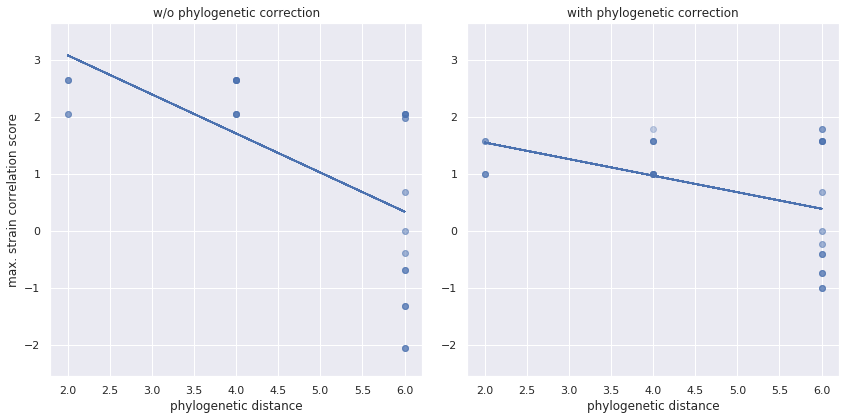

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
scale_max = max([x[1:2] for x in score_comparison])[0] + 1
scale_min = min([x[1:2] for x in score_comparison])[0] - 0.5

ax1.set_title('w/o phylogenetic correction')
ax1.set_ylabel('max. strain correlation score')
ax1.set_xlabel('phylogenetic distance')
ax1.set_ylim(scale_min, scale_max)
ax1.scatter(rand_jitter([x[0] for x in score_comparison]), rand_jitter([x[1] for x in score_comparison]), alpha=0.3)

x = [x[0] for x in score_comparison]
y = [x[1] for x in score_comparison]
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)
ax1.plot(x, p(x))

ax2.set_title('with phylogenetic correction')
ax2.set_xlabel('phylogenetic distance')
ax2.set_ylim(scale_min, scale_max)
ax2.scatter(rand_jitter([x[0] for x in score_comparison]), rand_jitter([x[2] for x in score_comparison]), alpha=0.3)

x = [x[0] for x in score_comparison]
y = [x[2] for x in score_comparison]
z = numpy.polyfit(x, y, 1)
p = numpy.poly1d(z)
ax2.plot(x, p(x))


plt.tight_layout()

plt.savefig('fig_phylo_score_correlation_synthetic.pdf')